<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_020_feature_selection_eduaction_marriage_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Highly Predictive Features

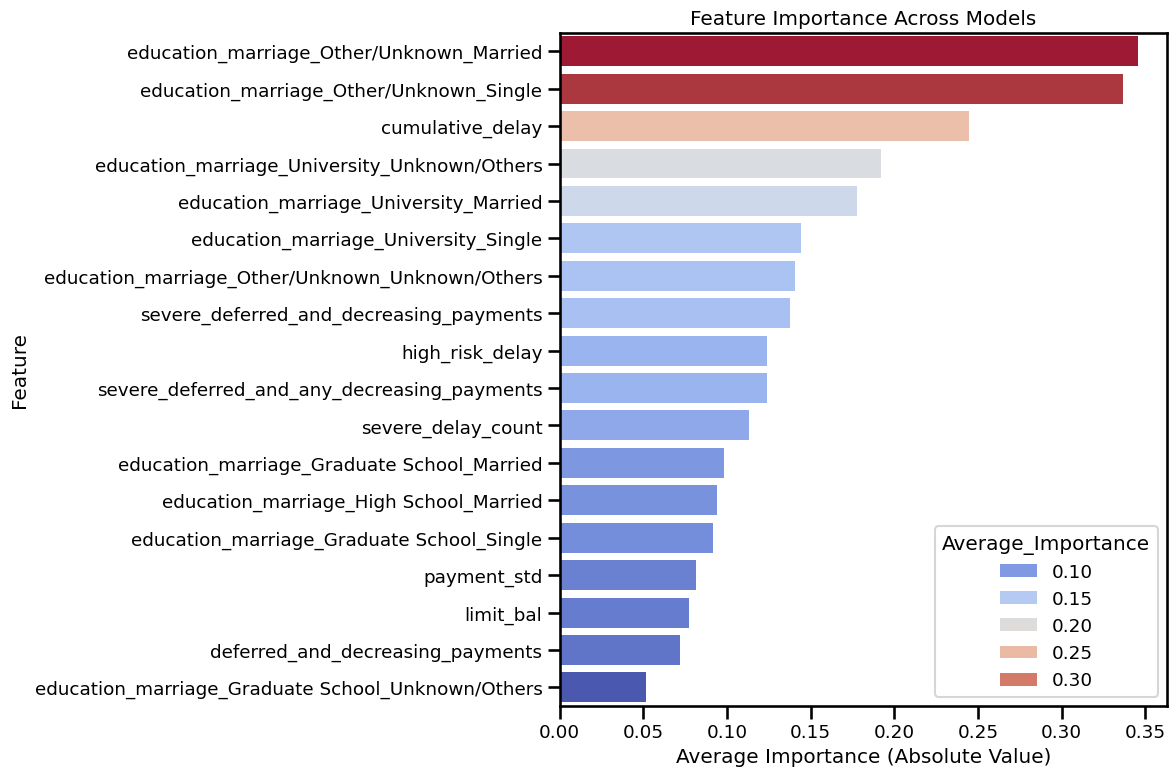

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize an empty DataFrame to store the merged reports
merged_df = pd.DataFrame()

# Loop through each model report and merge them on the 'Feature' column
for model_name, report in selected_features.items():
    # Convert the current report to a DataFrame
    df = pd.DataFrame(report.items(), columns=["Feature", f"{model_name}_Importance"])

    # Merge the current DataFrame with the merged DataFrame
    if merged_df.empty:
        merged_df = df  # If it's the first report, initialize merged_df
    else:
        merged_df = pd.merge(merged_df, df, on="Feature", how="inner")

# print("\nUniversally important features:")
# merged_df['Feature']

# Step 1: Create a new column that calculates the average absolute importance across all models
# Apply abs() to ensure we consider absolute values of importance
merged_df['Average_Importance'] = merged_df.iloc[:, 1:].apply(lambda row: row.abs().mean(), axis=1)

# Step 2: Sort the DataFrame by the new 'Average_Importance' column in descending order
sorted_df = merged_df.sort_values(by='Average_Importance', ascending=False)

# Step 3: (Optional) Save the sorted DataFrame to a new JSON or CSV file for future reference
sorted_df.to_csv('sorted_feature_importance.csv', index=False)

# Step 1: Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Average_Importance',
    y='Feature',
    data=sorted_df, hue="Average_Importance",
    palette='coolwarm'
)

# Step 2: Add labels and title
plt.xlabel('Average Importance (Absolute Value)')
plt.ylabel('Feature')
plt.title('Feature Importance Across Models')

# Step 3: Display the plot
plt.tight_layout()
plt.show()

In [ ]:
education_marriage_columns = sorted_df["Feature"].tolist() + ['education']
print(X_train_processed_df[education_marriage_columns].columns)

Index(['education_marriage_Other/Unknown_Married',
       'education_marriage_Other/Unknown_Single', 'cumulative_delay',
       'education_marriage_University_Unknown/Others',
       'education_marriage_University_Married',
       'education_marriage_University_Single',
       'education_marriage_Other/Unknown_Unknown/Others',
       'severe_deferred_and_decreasing_payments', 'high_risk_delay',
       'severe_deferred_and_any_decreasing_payments', 'severe_delay_count',
       'education_marriage_Graduate School_Married',
       'education_marriage_High School_Married',
       'education_marriage_Graduate School_Single', 'payment_std', 'limit_bal',
       'deferred_and_decreasing_payments',
       'education_marriage_Graduate School_Unknown/Others', 'education'],
      dtype='object')


### Load & Preprocess Data

Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

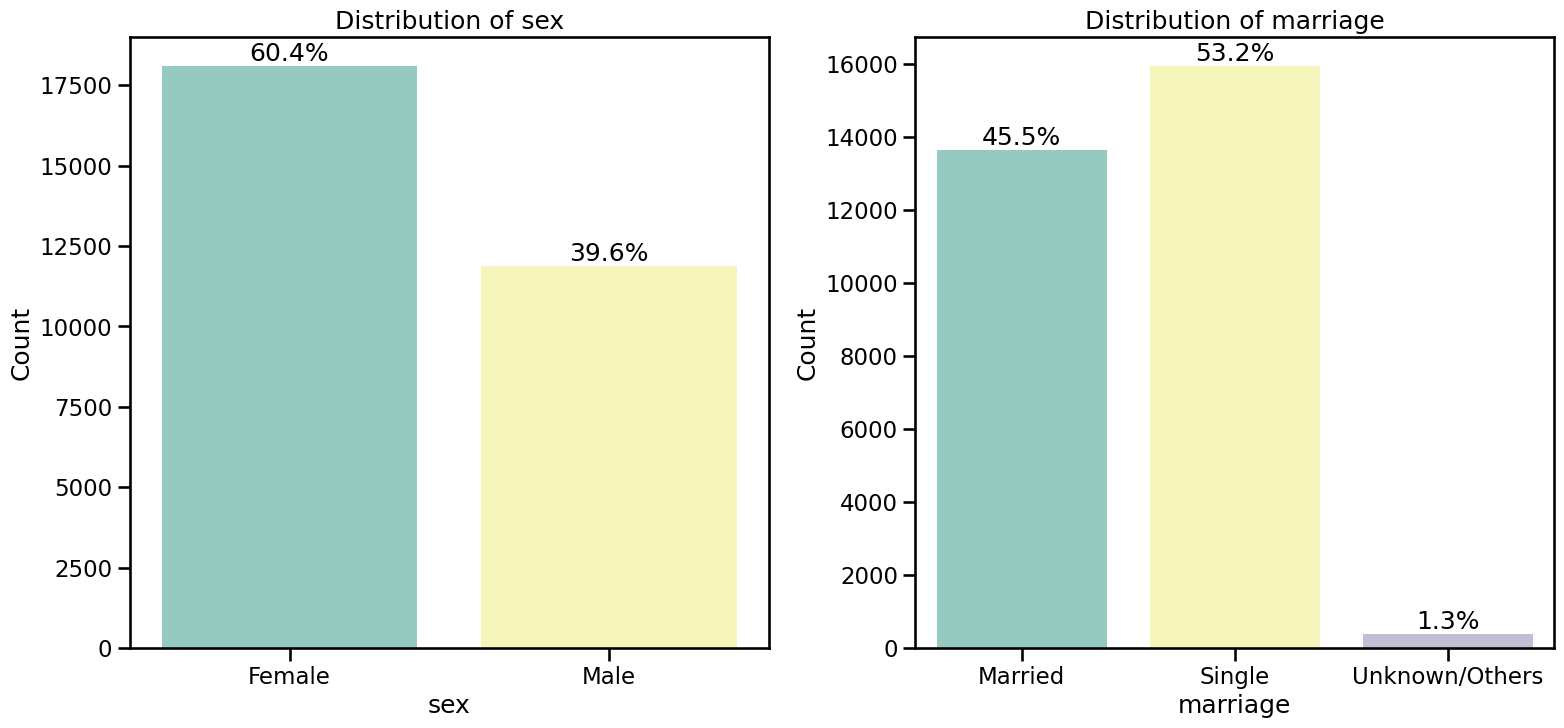

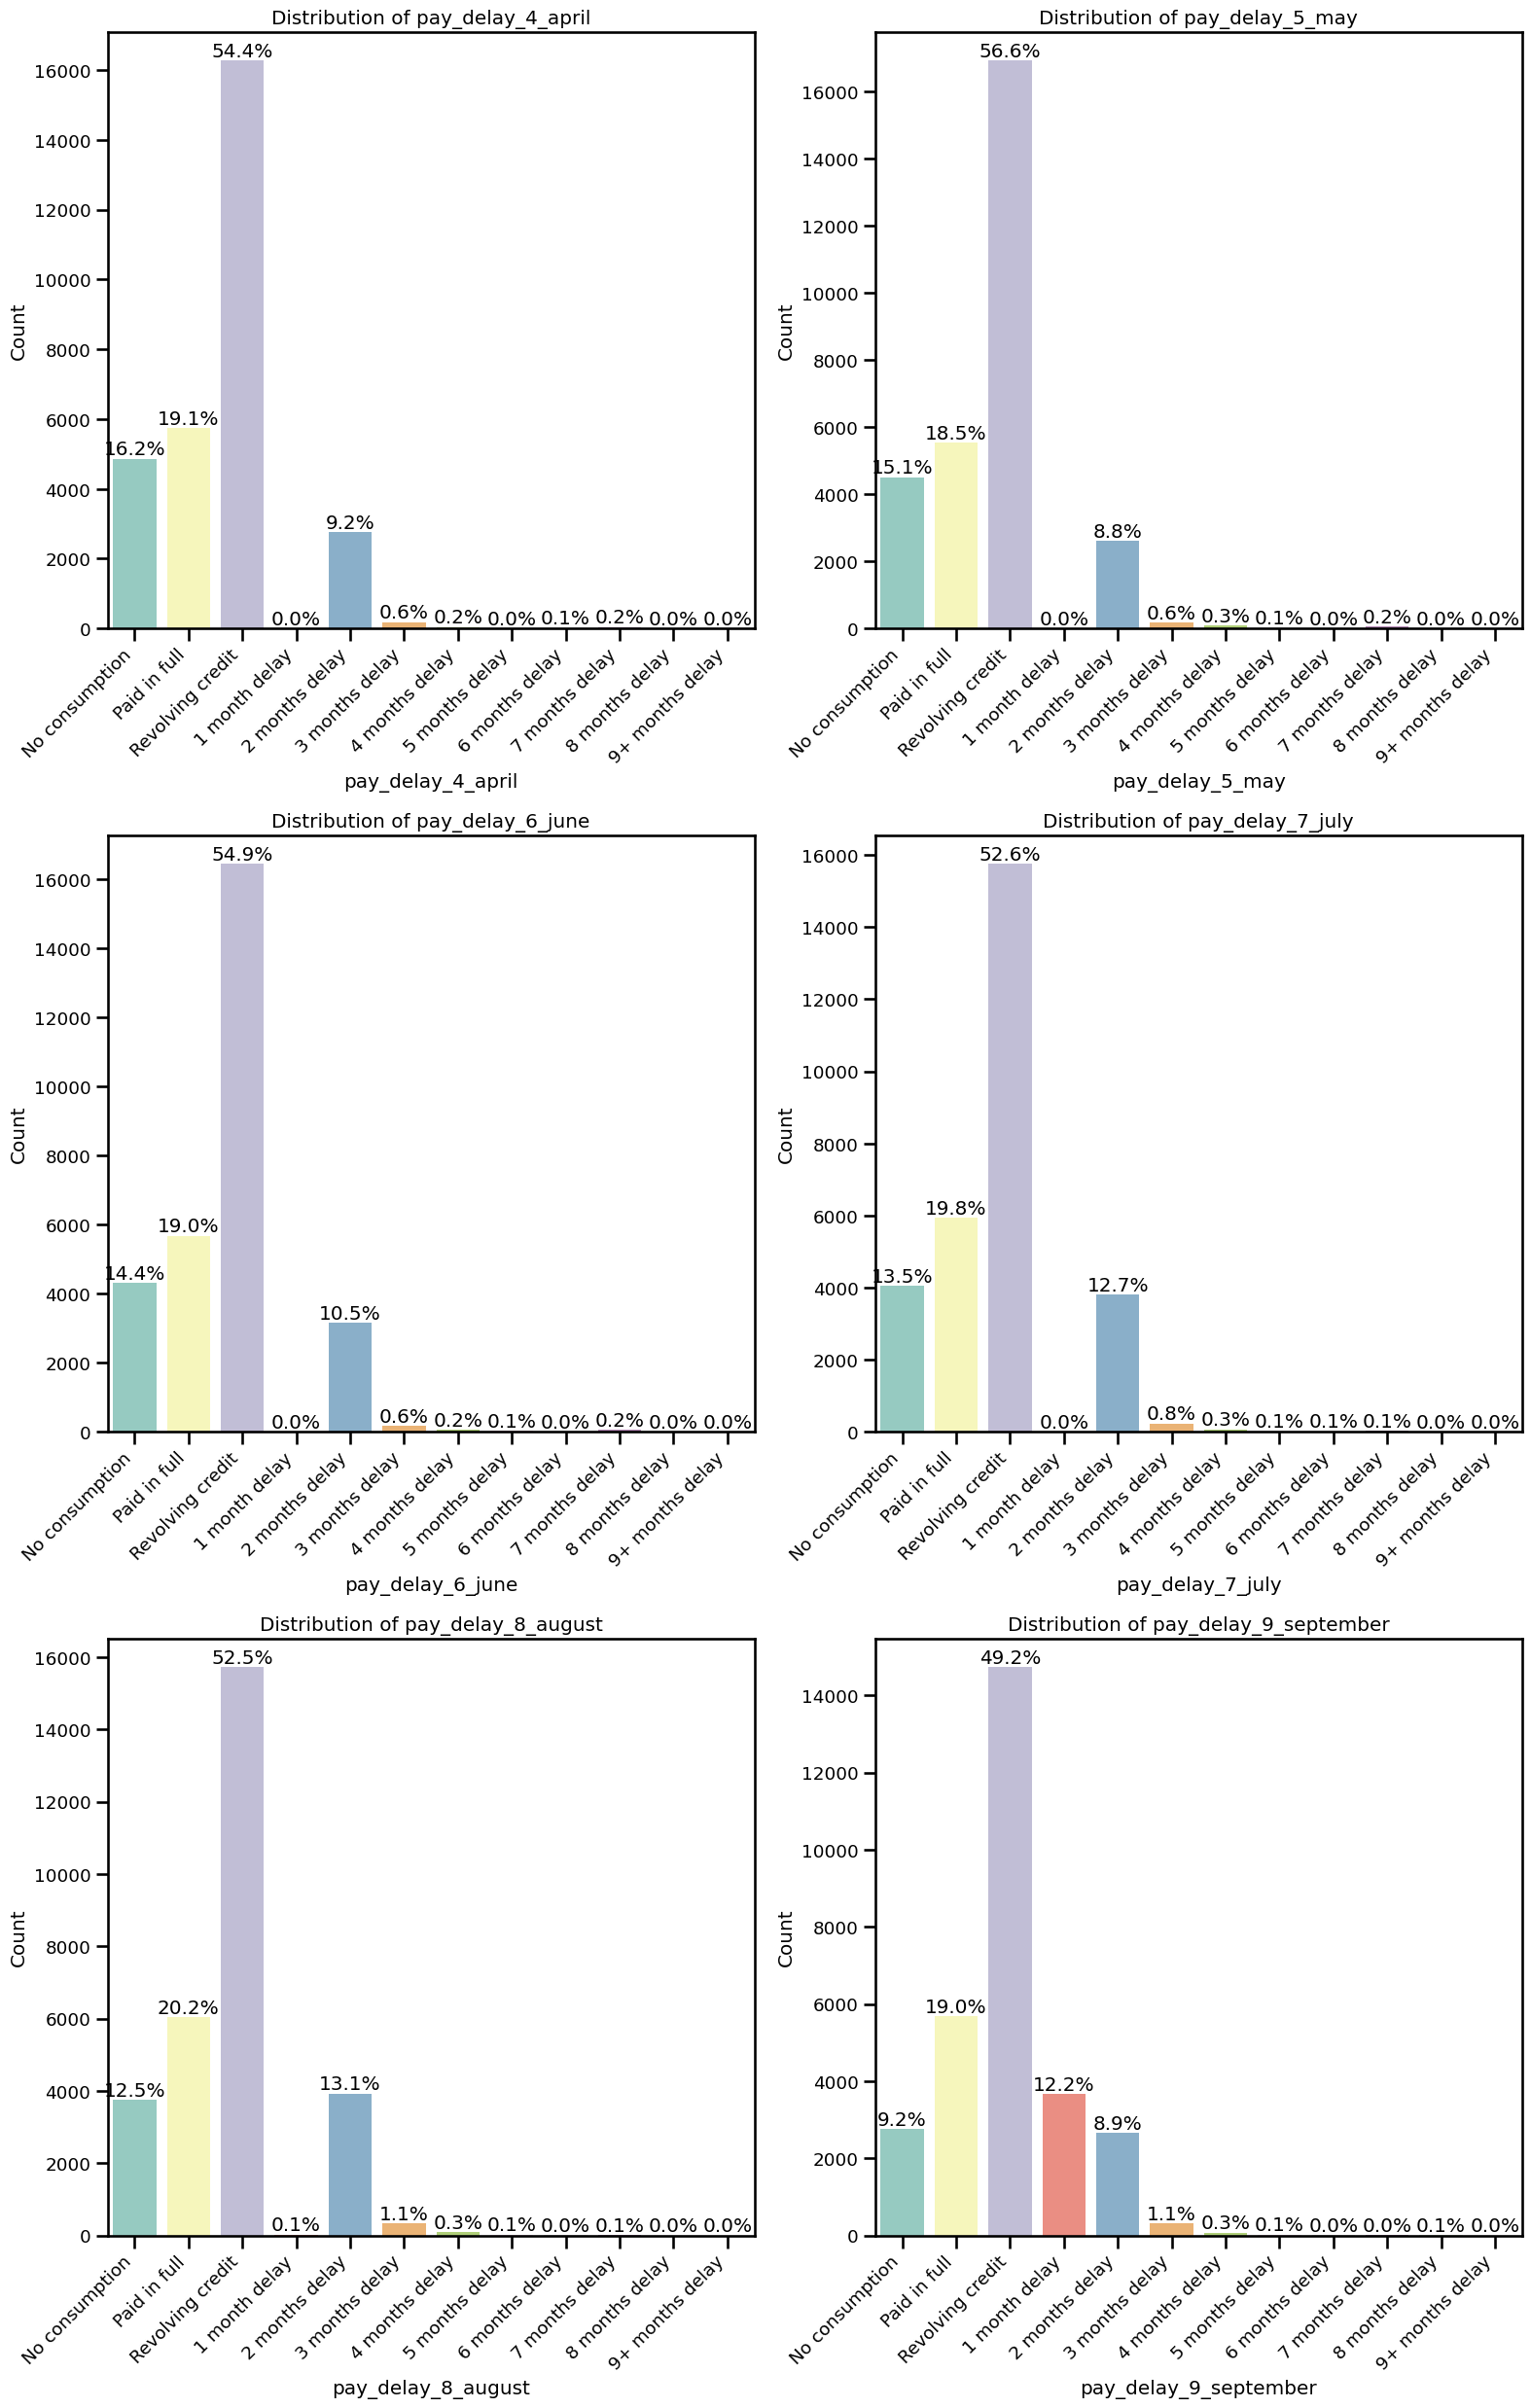

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,load_and_preprocess_data,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column, process_sex_column_cat_codes_one_two,
                             process_marriage_column, process_default_payment_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns, categorical_columns,
                             plot_categorical_distributions, plot_ordinal_distributions)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

# Now, load the data
df = load_and_preprocess_data(url, categorical_columns, target)

if df is not None:
    # Ensure the target column is treated as a categorical variable
    df[target] = df[target].astype('category')

    # Print data overview
    data_overview(df)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    df = df.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {df.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in df.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    check_categorical_order(df, categorical_columns + pay_cols + [target])
else:
    print("Error loading and preprocessing data.")

# # Convert Target to Categorical
# df[target] = df[target].cat.codes  # Convert to categorical codes (0, 1)
# # Check the results
# print('Target converted to numeric')
# print(df[target].unique())  # Should output [0, 1]
print(df[target].value_counts())

# visualize the categorical data
plot_categorical_distributions(df, categorical_columns)
plot_ordinal_distributions(df, ordinal_columns)

## **Education & Marriage Exploration**

Here’s a structured plan to help you investigate the features in-depth based on your data, focusing on feature importance and the interactions between categorical variables. I’ve broken it down into steps to guide your analysis:

### 1. **Understand the Feature Engineering Process**
   - **Feature Origin:** Investigate how the categorical variables (e.g., `education_marriage_Other/Unknown_Married`, `education_marriage_University_Single`) were created. Ensure you understand what each engineered feature represents and how the combinations affect the target variable (`default_payment_next_month`).
   - **Examine Feature Definitions:** Go back to your feature engineering process and document what each feature (especially the top-ranked categorical ones) captures in terms of risk or default patterns.

### 2. **Investigate Individual Feature Behavior**
   - **Distribution Analysis:**
     - Plot the distribution of each of these top features using histograms or bar plots to understand their spread.
     - Investigate the balance within these categories (e.g., `education_marriage_Other/Unknown_Single`). This will give you a sense of whether certain combinations (e.g., `Other/Unknown`) are more frequent or rare and how that correlates with default rates.
   - **Target Analysis:**
     - Group by each feature and calculate the default rate. For example, analyze how the different levels of `education_marriage_*` impact the probability of default.
     - Investigate whether certain categories are disproportionately associated with defaults.

### 3. **Correlation and Interaction Analysis**
   - **Correlation Heatmap:**
     - Create a correlation matrix to check for relationships between these features and other variables (both numeric and categorical).
     - Pay special attention to high correlations between engineered categorical features and numeric features like `limit_bal`, `cumulative_delay`, `payment_std`, etc. This will help identify if the behavior of categorical groups is linked to other financial indicators.
   - **Interaction Effects:**
     - If these features interact with other variables, test interaction terms or conditional plots. For instance, how does `cumulative_delay` behave within each `education_marriage` group?

### 4. **Assess the Impact on Model Performance**
   - **Feature Importance Across Models:**
     - Confirm that these categorical features are consistently important across various models (e.g., Random Forest, XGBoost). This helps ensure their robustness.
     - Use SHAP (SHapley Additive exPlanations) values or permutation importance to visualize how these features contribute to model predictions.
   - **Model Performance with Selected Features:**
     - Retrain models using only these high-importance features. Compare the model's performance (precision, recall, F1 score) to determine if these features alone are predictive enough or need support from other variables.

### 5. **Explore Class Imbalance and Resampling Effects**
   - **Post-SMOTE Behavior:**
     - After applying SMOTE, investigate how these categorical features are being balanced. Does SMOTE introduce bias or noise for some rare combinations (e.g., `education_marriage_Other/Unknown_Unknown/Others`)?
     - Recheck feature importance after SMOTE to confirm the stability of these features in the balanced dataset.

### 6. **Feature Interaction and Grouping**
   - **Binning and Grouping Analysis:**
     - You may consider grouping low-frequency categories (e.g., `education_marriage_Other/Unknown`) if you find they do not contribute much to the model's performance but are adding noise.
   - **Interaction Terms for Categories:**
     - Create interaction terms between these high-importance categorical features and numeric features (e.g., `limit_bal`, `payment_std`). Evaluate their importance to check for any latent interactions not captured in the existing features.

### 7. **Investigate Model Interpretability**
   - **Partial Dependence Plots:**
     - Use partial dependence plots to visualize the marginal effect of these categorical features on the probability of default.
     - Check if the trends are interpretable (e.g., does higher education in certain marriage categories reduce default likelihood?).
   - **SHAP Analysis:**
     - For deeper interpretability, use SHAP values to understand how changes in specific categories impact predictions. This will help you see which categories (e.g., `University_Single`) are driving higher or lower risks.

### 8. **Address Potential Overfitting**
   - **Overfitting Investigation:**
     - Ensure that these categorical variables are not overfitting the model. Check performance on the test set and compare it with the training set, especially for models that heavily depend on categorical splits (e.g., decision trees, ensemble methods).
   - **Cross-validation and Regularization:**
     - Perform cross-validation to ensure the stability of these features across different folds.
     - Investigate the need for regularization techniques (e.g., Lasso, Ridge) to handle possible noise introduced by certain categories.

### 9. **Explainability for Business Use**
   - **Business-Relevant Insights:**
     - Finally, ensure that these categorical features make sense in a business context. Are there specific combinations of education and marriage that lenders should focus on? Are there high-risk categories that can be flagged early for intervention?



### Education & Marriage Interaction Transformer

class EducationMarriageInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_column='education', marriage_column='marriage'):
        self.education_column = education_column
        self.marriage_column = marriage_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create the education_marriage interaction feature
        X['education_marriage'] = X[self.education_column].astype(str) + '_' + X[self.marriage_column].astype(str)

        return X

In [ ]:
cols = ['education', 'marriage']
for c in cols:
    print(df[c].unique())

['University', 'Graduate School', 'High School', 'Other/Unknown']
Categories (4, object): ['Other/Unknown' < 'High School' < 'University' < 'Graduate School']
['Married', 'Single', 'Unknown/Others']
Categories (3, object): ['Married', 'Single', 'Unknown/Others']


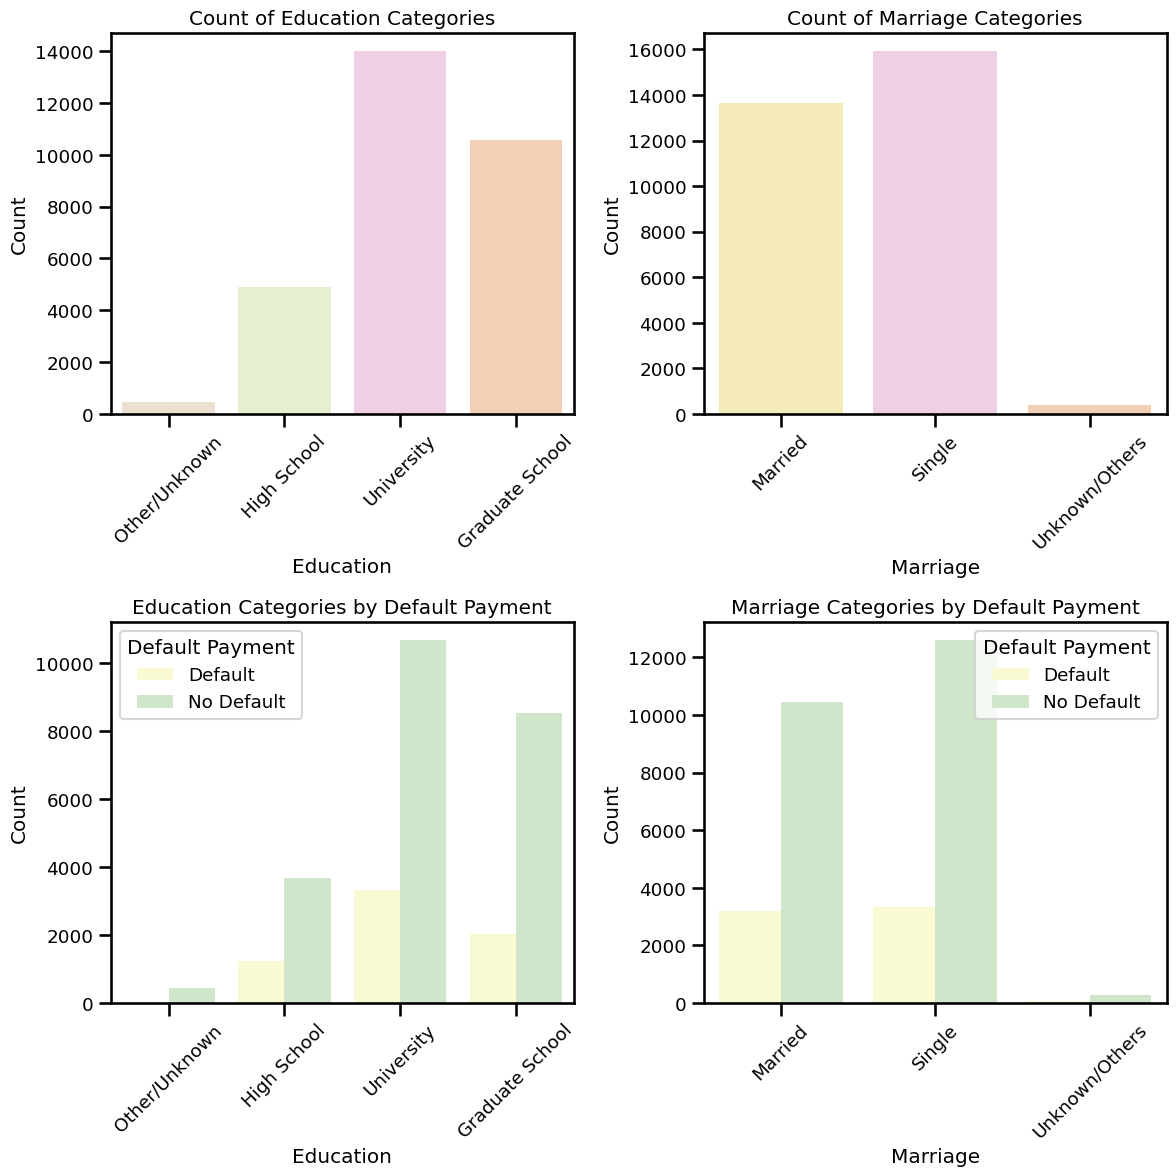

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = 'Pastel2_r'

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns

# Plot for 'education' column
sns.countplot(ax=axes[0, 0], data=df, x='education', hue='education', palette=palette)
axes[0, 0].set_title('Count of Education Categories')
axes[0, 0].set_xlabel('Education')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for 'marriage' column
sns.countplot(ax=axes[0, 1], data=df, x='marriage', hue='marriage', palette=palette)
axes[0, 1].set_title('Count of Marriage Categories')
axes[0, 1].set_xlabel('Marriage')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Use a different color palette for the target-based plots
palette = 'Pastel1_r'

# Plot for 'education' column, colored by 'default_payment_next_month'
sns.countplot(ax=axes[1, 0], data=df, x='education', hue='default_payment_next_month', palette=palette)
axes[1, 0].set_title('Education Categories by Default Payment')
axes[1, 0].set_xlabel('Education')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Default Payment', loc='upper left')

# Plot for 'marriage' column, colored by 'default_payment_next_month'
sns.countplot(ax=axes[1, 1], data=df, x='marriage', hue='default_payment_next_month', palette=palette)
axes[1, 1].set_title('Marriage Categories by Default Payment')
axes[1, 1].set_xlabel('Marriage')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Default Payment', loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Filter the dataset to focus on 'Other/Unknown' for education and marriage
df_filtered = df[(df['education'] == 'Other/Unknown') | (df['marriage'] == 'Unknown/Others')]

# Crosstab for education vs default_payment_next_month
education_contingency = pd.crosstab(df_filtered['education'], df_filtered['default_payment_next_month'])

# Chi-square test for education and default_payment_next_month
chi2_education, p_education, dof_education, expected_education = chi2_contingency(education_contingency)
print("Chi-Square Test for Education vs Loan Defaults:")
print(f"Chi-Square Statistic: {chi2_education}, p-value: {p_education}")

# Crosstab for marriage vs default_payment_next_month
marriage_contingency = pd.crosstab(df_filtered['marriage'], df_filtered['default_payment_next_month'])

# Chi-square test for marriage and default_payment_next_month
chi2_marriage, p_marriage, dof_marriage, expected_marriage = chi2_contingency(marriage_contingency)
print("\nChi-Square Test for Marriage vs Loan Defaults:")
print(f"Chi-Square Statistic: {chi2_marriage}, p-value: {p_marriage}")

Chi-Square Test for Education vs Loan Defaults:
Chi-Square Statistic: 50.3158594580523, p-value: 6.842740712370198e-11

Chi-Square Test for Marriage vs Loan Defaults:
Chi-Square Statistic: 44.94178185991175, p-value: 1.741871308501365e-10


### Chi-Square

The results of the Chi-Square tests for `education` and `marriage` against `loan defaults` (represented by `default_payment_next_month`) show the following key points:

### 1. **Chi-Square Test for Education vs Loan Defaults:**
   - **Chi-Square Statistic**: 50.32
   - **p-value**: 6.84e-11 (which is 0.0000000000684)

####**Interpretation**:
   - The **Chi-Square statistic** of 50.32 indicates a substantial difference between the observed and expected frequencies for `education` categories (with `Other/Unknown`) and `loan defaults`.
   - The **p-value** is extremely small (much less than the typical threshold of 0.05), suggesting **strong evidence** to reject the null hypothesis, which assumes that `education` and `loan defaults` are independent.
   - **Conclusion**: There is a statistically significant association between the `education` category (including `Other/Unknown`) and loan defaults. This suggests that the `Other/Unknown` category of education, in particular, may be influencing the likelihood of loan defaults.

### 2. **Chi-Square Test for Marriage vs Loan Defaults:**
   - **Chi-Square Statistic**: 44.94
   - **p-value**: 1.74e-10 (which is 0.000000000174)

####**Interpretation**:
   - The **Chi-Square statistic** of 44.94 also shows a large difference between observed and expected frequencies for `marriage` categories (with `Unknown/Others`) and `loan defaults`.
   - The **p-value** is again extremely small (much less than 0.05), indicating strong evidence to reject the null hypothesis of independence between `marriage` categories and `loan defaults`.
   - **Conclusion**: There is a statistically significant association between the `marriage` category (including `Unknown/Others`) and loan defaults. This means that marital status, especially the `Unknown/Others` category, appears to be linked to loan default behavior.

### General Conclusion:
- Both tests show very strong statistical evidence of a relationship between the `Other/Unknown` categories in `education` and `marriage` and loan default behavior.
- This means that individuals in these less defined or "other/unknown" categories for education and marital status may have different default patterns compared to those in more traditional or well-defined categories.

### Next Steps:
- Given this significant association, you may want to:
   - Investigate further why the `Other/Unknown` categories are contributing to loan defaults.
   - Consider whether this category captures riskier groups that are not represented well in traditional education or marital status categories.
   - Use this information to improve model performance by treating these categories differently or adding additional features to capture the nuances.

## Data Exploration - Group Unknown

In [ ]:
# Group 1: Where education == "Other/Unknown" and/or marriage == 'Unknown/Others'
group_unknown = df[(df['education'] == 'Other/Unknown') | (df['marriage'] == 'Unknown/Others')]
# Group 2: Where education and marriage are known categories
group_known = df[(df['education'] != 'Other/Unknown') & (df['marriage'] != 'Unknown/Others')]

# Check the size of each group
print("Group with 'Other/Unknown' categories:")
print(group_unknown.shape)

print("\nGroup with known categories:")
print(group_known.shape)

# Remove unused categories for group_unknown
group_unknown.loc[:, 'education'] = group_unknown['education'].cat.remove_unused_categories()
group_unknown.loc[:, 'marriage'] = group_unknown['marriage'].cat.remove_unused_categories()

# Remove unused categories for group_known
group_known.loc[:, 'education'] = group_known['education'].cat.remove_unused_categories()
group_known.loc[:, 'marriage'] = group_known['marriage'].cat.remove_unused_categories()

# Check the updated categories
print("Updated categories in group_unknown:")
print(group_unknown['education'].cat.categories)
print(group_unknown['marriage'].cat.categories)

print("\nUpdated categories in group_known:")
print(group_known['education'].cat.categories)
print(group_known['marriage'].cat.categories)

# cols = ['education', 'marriage']
# for c in cols:
#     print(group_unknown[c].unique())
#     print(group_unknown[c].cat.categories)
#     print(group_known[c].unique())
#     print(group_known[c].cat.categories)

Group with 'Other/Unknown' categories:
(837, 24)

Group with known categories:
(29128, 24)
Updated categories in group_unknown:
Index(['Other/Unknown', 'High School', 'University', 'Graduate School'], dtype='object')
Index(['Married', 'Single', 'Unknown/Others'], dtype='object')

Updated categories in group_known:
Index(['High School', 'University', 'Graduate School'], dtype='object')
Index(['Married', 'Single'], dtype='object')


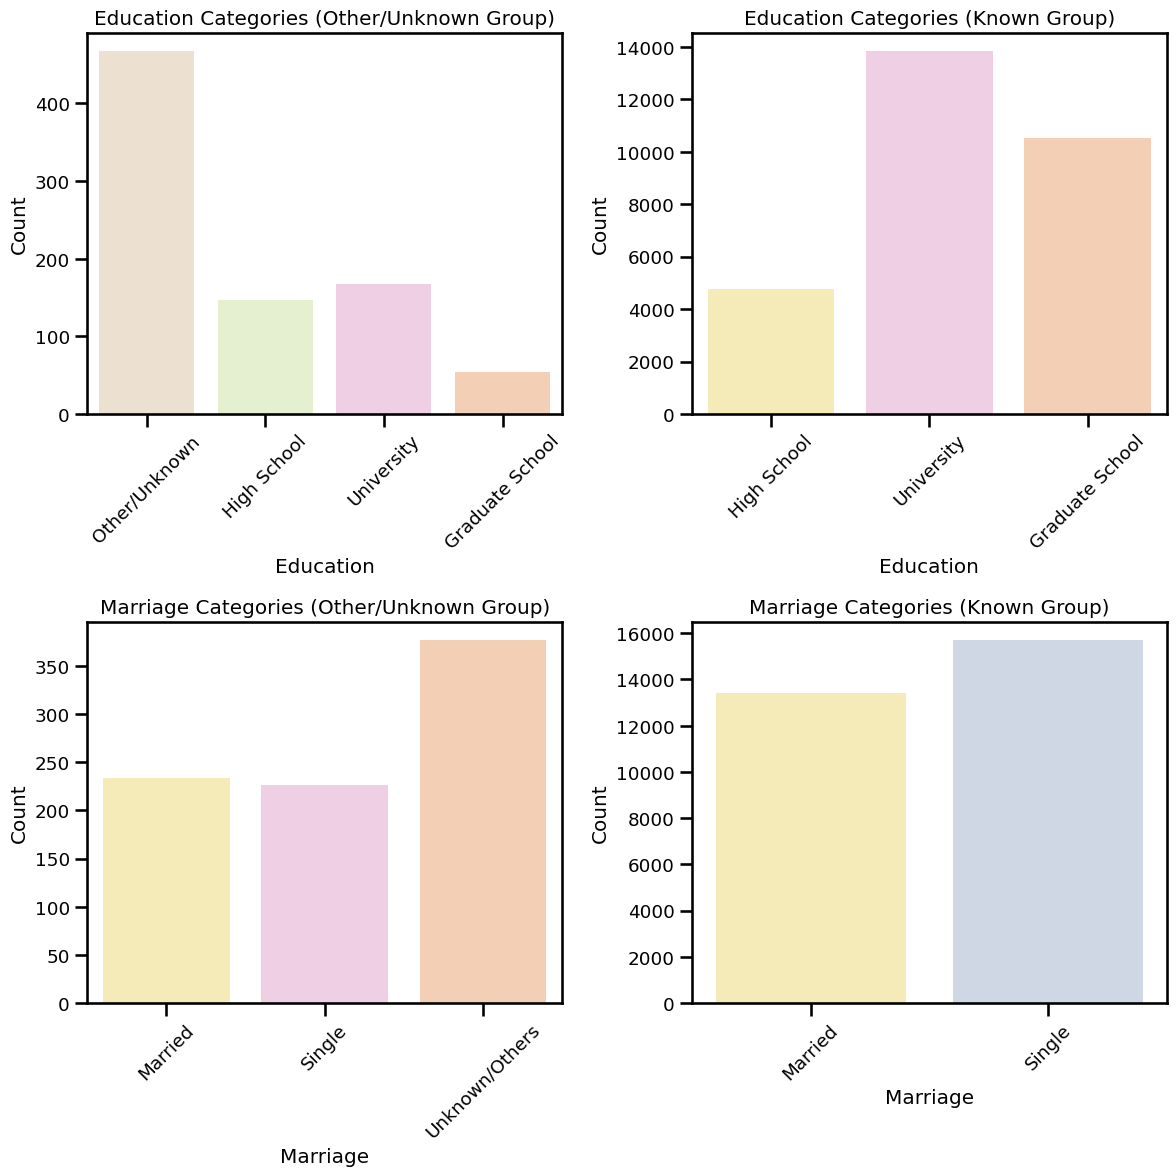

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = 'Pastel2_r'

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns

# Plot for 'education' column, Group Unknown
sns.countplot(ax=axes[0, 0], data=group_unknown, x='education', hue='education', palette=palette)
axes[0, 0].set_title('Education Categories (Other/Unknown Group)')
axes[0, 0].set_xlabel('Education')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for 'education' column, Group Known
sns.countplot(ax=axes[0, 1], data=group_known, x='education', hue='education', palette=palette)
axes[0, 1].set_title('Education Categories (Known Group)')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for 'marriage' column, Group Unknown
sns.countplot(ax=axes[1, 0], data=group_unknown, x='marriage', hue='marriage', palette=palette)
axes[1, 0].set_title('Marriage Categories (Other/Unknown Group)')
axes[1, 0].set_xlabel('Marriage')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for 'marriage' column, Group Known
sns.countplot(ax=axes[1, 1], data=group_known, x='marriage', hue='marriage', palette=palette)
axes[1, 1].set_title('Marriage Categories (Known Group)')
axes[1, 1].set_xlabel('Marriage')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()



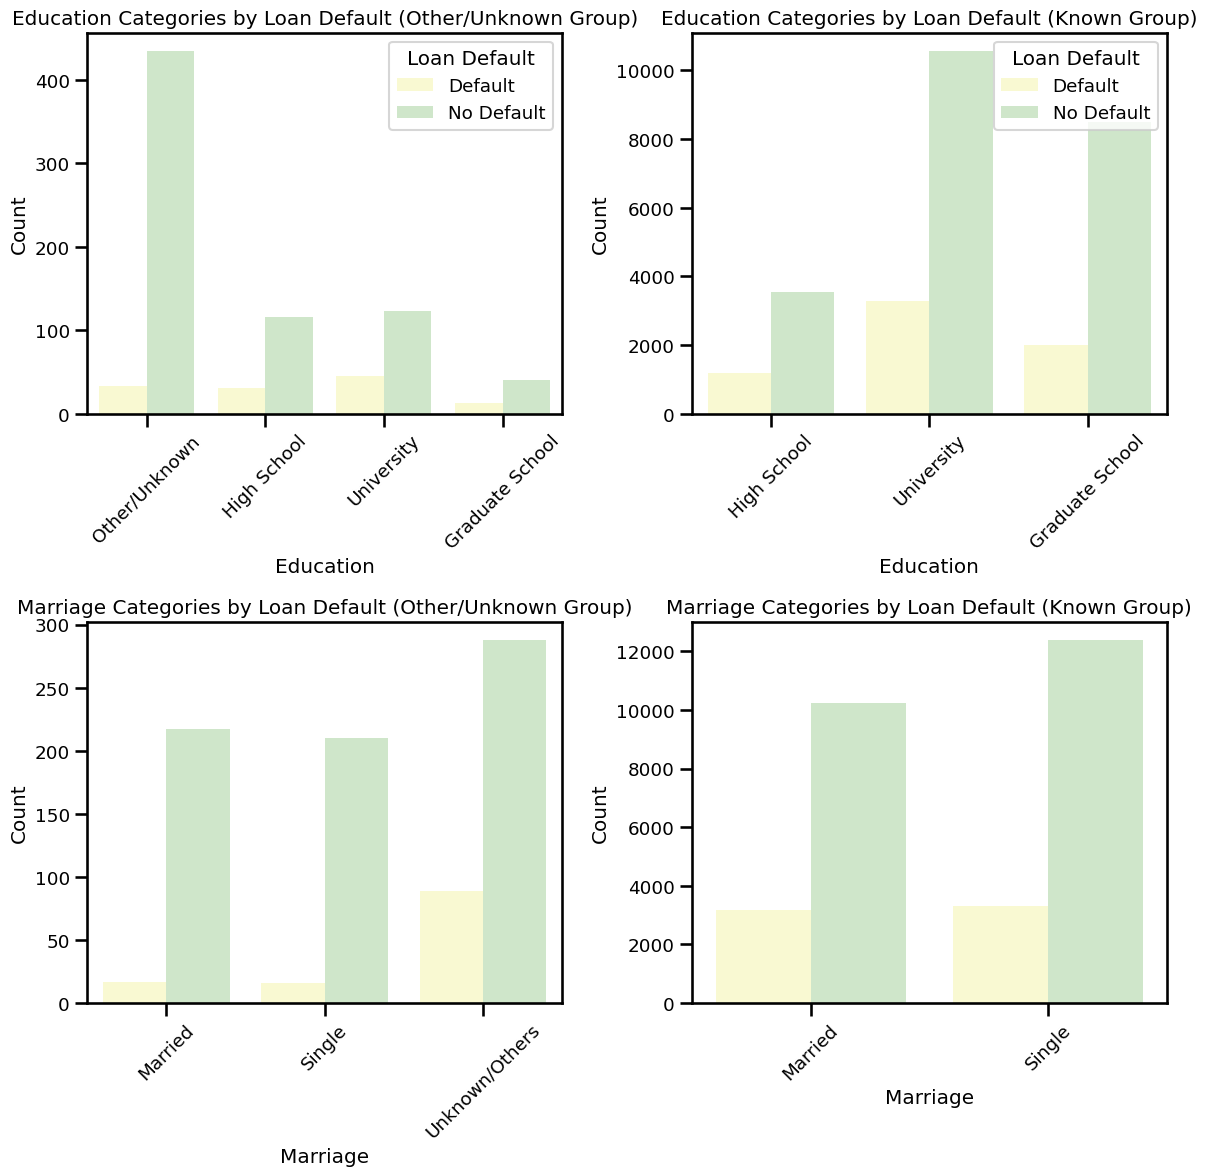

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = 'Pastel1_r'

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns

# Plot for 'education' column, Group Unknown, colored by loan defaults
sns.countplot(ax=axes[0, 0], data=group_unknown, x='education', hue='default_payment_next_month', palette=palette)
axes[0, 0].set_title('Education Categories by Loan Default (Other/Unknown Group)')
axes[0, 0].set_xlabel('Education')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title='Loan Default', loc='upper right')

# Plot for 'education' column, Group Known, colored by loan defaults
sns.countplot(ax=axes[0, 1], data=group_known, x='education', hue='default_payment_next_month', palette=palette)
axes[0, 1].set_title('Education Categories by Loan Default (Known Group)')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Loan Default', loc='upper right')

# Plot for 'marriage' column, Group Unknown, colored by loan defaults
sns.countplot(ax=axes[1, 0], data=group_unknown, x='marriage', hue='default_payment_next_month', palette=palette, legend=False)
axes[1, 0].set_title('Marriage Categories by Loan Default (Other/Unknown Group)')
axes[1, 0].set_xlabel('Marriage')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
# axes[1, 0].legend(title='Loan Default', loc='upper right')

# Plot for 'marriage' column, Group Known, colored by loan defaults
sns.countplot(ax=axes[1, 1], data=group_known, x='marriage', hue='default_payment_next_month', palette=palette, legend=False)
axes[1, 1].set_title('Marriage Categories by Loan Default (Known Group)')
axes[1, 1].set_xlabel('Marriage')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
# axes[1, 1].legend(title='Loan Default', loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()



## Cumulative Delay

In [ ]:
# Define the "Unknown" category columns
unknown_columns = [
    'education_marriage_Other/Unknown_Married',
    'education_marriage_Other/Unknown_Single',
    'education_marriage_Other/Unknown_Unknown/Others',
    'education_marriage_University_Unknown/Others',
    'education_marriage_Graduate School_Unknown/Others',
    'education_marriage_High School_Unknown/Others'
]

# Split data into "Unknown" and "Known" groups based on any of the "Unknown" columns
group_unknown_processed = X_train_processed_df[X_train_processed_df[unknown_columns].max(axis=1) == 1]
group_known_processed = X_train_processed_df[X_train_processed_df[unknown_columns].max(axis=1) == 0]

# Check the size of each group
print("Group with 'Other/Unknown' categories:")
print(group_unknown_processed.shape)

print("\nGroup with known categories:")
print(group_known_processed.shape)

Group with 'Other/Unknown' categories:
(697, 53)

Group with known categories:
(36338, 53)


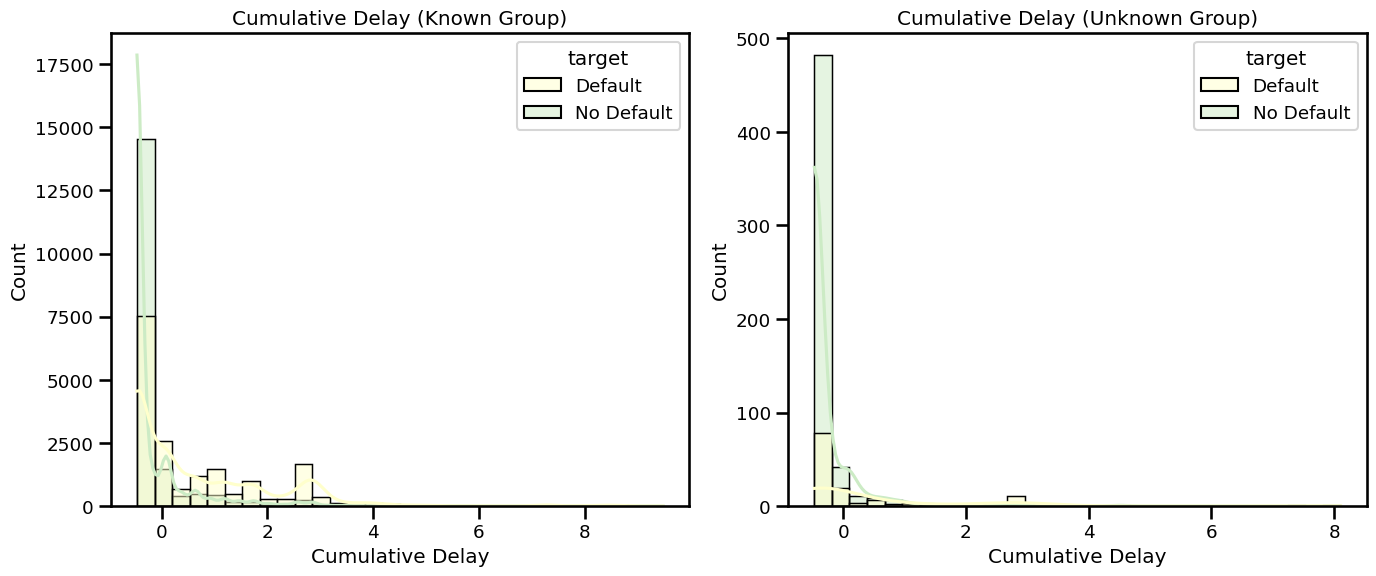

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = 'Pastel1_r'

# Set up the figure and axes for a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot histogram for Known Group
sns.histplot(data=group_known_processed, x='cumulative_delay', bins=30, kde=True, hue='target', ax=axes[0], palette=palette)
axes[0].set_title('Cumulative Delay (Known Group)')
axes[0].set_xlabel('Cumulative Delay')
axes[0].set_ylabel('Count')

# Plot histogram for Unknown Group
sns.histplot(data=group_unknown_processed, x='cumulative_delay', bins=30, kde=True, hue='target', ax=axes[1], palette=palette)
axes[1].set_title('Cumulative Delay (Unknown Group)')
axes[1].set_xlabel('Cumulative Delay')
axes[1].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


### ANOVA

Performing a two-way ANOVA using **Ordinary Least Squares (OLS) regression** to evaluate whether there is a statistically significant relationship between the **cumulative delay** (dependent variable) and two independent variables:
1. **Group**: Known vs. Unknown (indicating education and marriage category status).
2. **Target**: Loan default status (whether the person defaulted or not).

### Key Components:

1. **`cumulative_delay`** (Dependent Variable):
   - This is the **dependent variable** (sometimes referred to as the response variable or outcome variable) in the model. The ANOVA test checks how this variable is affected by the independent variables.

2. **`C(group)`** (Independent Variable 1 - Group):
   - `group` is a categorical variable that represents whether the row belongs to the "Known" or "Unknown" group.
   - The **`C()`** notation here explicitly tells the model to treat `group` as a **categorical** variable.
   - If we didn't use `C()`, the model might try to treat `group` as a continuous variable (numeric), which would be incorrect in this case because it's a categorical distinction between two groups.

3. **`C(target)`** (Independent Variable 2 - Loan Default):
   - `target` (or `loan_default`) is another **categorical** variable indicating the loan default status (Default or No Default).
   - Again, we use `C()` to explicitly tell the model that this is a **categorical** variable.

4. **`C(group) * C(target)`** (Interaction Term):
   - The `*` operator represents the **interaction effect** between the `group` and `target` variables.
   - **Interaction Effect**: This tests whether the effect of one variable (e.g., `group`) on the outcome (`cumulative_delay`) depends on the other variable (e.g., `target`). For example, it checks whether being in the "Unknown" group affects the cumulative delay differently for those who defaulted vs. those who didn’t.

### Full Model Breakdown:

- **`cumulative_delay ~ C(group)`**: This part of the model checks how the cumulative delay differs based on whether someone is in the Known or Unknown group.
- **`C(target)`**: This part checks how the cumulative delay differs based on whether someone defaulted on their loan or not.
- **`C(group) * C(target)`**: This part checks if there's an interaction effect—whether the effect of being in the Known or Unknown group depends on the loan default status (and vice versa).

### Why Use `C()`?

In OLS models, you generally use `C()` when you want to treat a variable as categorical. This is crucial because, without `C()`, the model might treat these variables as continuous (numeric), leading to incorrect results. By wrapping `group` and `target` with `C()`, you ensure the model correctly handles them as discrete categories with distinct levels (e.g., Known/Unknown, Default/No Default).

### Example:

Imagine you want to assess how "Known/Unknown" status and "Default/No Default" status affect cumulative delay. You would use this model to answer questions like:
- Does cumulative delay differ between Known and Unknown groups?
- Does cumulative delay differ between Default and No Default cases?
- Is there an interaction between the two? For example, does being in the Unknown group only increase cumulative delay when a default occurs?

### Interpretation of ANOVA Results:

| Variable               | sum_sq       | df   | F-statistic    | p-value (`PR(>F)`) |
|------------------------|--------------|------|----------------|--------------------|
| **C(group)**            | 14.23        | 1    | 11.26          | 0.000792           |
| **C(target)**           | 6967.32      | 1    | 5515.35        | 0.000000           |
| **C(group):C(target)**  | 4.46         | 1    | 3.53           | 0.060262           |
| **Residual**            | 46779.81     | 37031| NaN            | NaN                |

### What the Results Mean:

1. **C(group)** (Group: Known vs Unknown):
   - **F-statistic**: 11.26
   - **p-value**: 0.000792
   
   **Interpretation**:
   - The p-value for `group` (0.000792) is very small (less than 0.05), meaning there is a statistically significant difference in the mean `cumulative_delay` between the **Known** and **Unknown** groups.
   - This suggests that belonging to the "Unknown" or "Known" group significantly affects the cumulative delay.

2. **C(target)** (Loan Default: Default vs No Default):
   - **F-statistic**: 5515.35
   - **p-value**: 0.000000 (essentially 0)
   
   **Interpretation**:
   - The p-value for `target` is extremely small, indicating a very strong statistical significance.
   - This means that there is a significant difference in `cumulative_delay` based on whether the person defaulted on their loan or not. Default status is strongly related to the cumulative delay.

3. **C(group):C(target)** (Interaction Effect: Group x Loan Default):
   - **F-statistic**: 3.53
   - **p-value**: 0.060262
   
   **Interpretation**:
   - The p-value for the interaction effect is 0.060262, which is slightly above the common threshold of 0.05.
   - This means that the interaction effect between **group** (Known/Unknown) and **target** (loan default) is **not statistically significant at the 5% level**. However, it is very close, so at a slightly more lenient threshold (like 0.10), it could be considered significant.
   - In practical terms, this suggests that while both group membership and loan default status individually impact cumulative delay, the way they interact does not have a strong combined effect on cumulative delay.

4. **Residual**:
   - The residual represents the unexplained variance in the data after accounting for the group, target, and their interaction. It doesn’t have an associated p-value, as it captures what’s left after the model explains the relationship.

### Summary:
- **Group Effect**: There is a statistically significant difference in `cumulative_delay` between the "Known" and "Unknown" groups.
- **Target Effect**: There is a very strong relationship between `loan_default` and `cumulative_delay`. People who default have significantly different cumulative delays compared to those who don’t.
- **Interaction**: The interaction between group and default status is **not statistically significant** at the 5% level, meaning that the relationship between group membership and cumulative delay is not strongly affected by whether the person defaulted.

### Practical Takeaway:
- Both **group membership** (Known/Unknown) and **loan default status** independently influence `cumulative_delay`.
- The interaction between the two is not strongly significant, meaning that the effect of being in the "Unknown" group on `cumulative_delay` is relatively consistent, regardless of loan default status.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Combine the known and unknown groups into one DataFrame with an additional column for 'group'
group_known_processed.loc[:, 'group'] = 'Known'
group_unknown_processed.loc[:, 'group'] = 'Unknown'

# Concatenate both groups
combined_df = pd.concat([group_known_processed, group_unknown_processed])

# Ensure that 'target' and 'group' are treated as categorical variables
combined_df['group'] = combined_df['group'].astype('category')


# Define the ANOVA model
model = ols('cumulative_delay ~ C(group) * C(target)', data=combined_df).fit()

# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                          sum_sq       df            F    PR(>F)
C(group)               14.225475      1.0    11.260916  0.000792
C(target)            6967.321912      1.0  5515.347103  0.000000
C(group):C(target)      4.459770      1.0     3.530364  0.060262
Residual            46779.811478  37031.0          NaN       NaN


### Distribution Normal?

ANOVA (Analysis of Variance) makes several assumptions, and one of the key assumptions is related to the **normal distribution** of the data. Here are the primary assumptions of ANOVA:

### 1. **Normality**:
   - **Assumption**: The residuals (errors) of the dependent variable should be normally distributed for each group.
   - **Explanation**: While the dependent variable (in this case, `cumulative_delay`) doesn't have to be normally distributed, the residuals (the differences between the observed and predicted values) for each group should follow a normal distribution.
   - **Why it matters**: ANOVA is robust to slight deviations from normality, especially when sample sizes are large, but significant departures from normality can lead to incorrect conclusions.

   **How to check**:
   - **Histogram or Q-Q Plot**: Plot the residuals to see if they approximate a normal distribution.
   - **Shapiro-Wilk Test**: A formal test of normality, although it's sensitive to large sample sizes.

   A **p-value > 0.05** suggests the residuals are normally distributed.

### 2. **Homogeneity of Variances (Homoscedasticity)**:
   - **Assumption**: The variance of the residuals should be equal across all groups (i.e., the variance within each group should be roughly the same).
   - **Why it matters**: If different groups have significantly different variances, it can lead to biased results in ANOVA.
   
   **How to check**:
   - **Levene’s Test**: A common statistical test to check if variances across groups are equal.

   A **p-value > 0.05** suggests that the variances are equal across groups.

### 3. **Independence of Observations**:
   - **Assumption**: The observations must be independent of each other.
   - **Why it matters**: Violating this assumption (e.g., if there is a time-related dependence or a hierarchical structure in the data) can lead to incorrect conclusions. This assumption typically needs to be verified based on the data collection process (e.g., ensuring no repeated measures or nested data).

### 4. **Additivity**:
   - **Assumption**: The effect of the factors is additive, meaning that the impact of each independent variable on the dependent variable is independent and can be added together.
   - **Why it matters**: This assumption is usually inherent in the design of the model and is part of the linear nature of ANOVA.

### What If Assumptions Are Violated?

If some of these assumptions are violated, you can:
1. **Transform the Data**: Apply a transformation (e.g., log transformation) to make the data more normally distributed or to equalize variances.
2. **Use a Robust Alternative**: If assumptions are severely violated, consider using a non-parametric alternative like the **Kruskal-Wallis test** (which doesn’t assume normality) or **Welch’s ANOVA** (which doesn’t assume equal variances).

The results of the **Shapiro-Wilk Test** and **Levene's Test** indicate that the assumptions of normality and equal variances are likely violated in your dataset. Let's break down the results:

### 1. **Shapiro-Wilk Test for Normality**:
   - **p-value: 3.60e-112** (essentially 0)
   
   **Interpretation**:
   - The Shapiro-Wilk test checks whether the residuals of the model follow a normal distribution.
   - A **p-value < 0.05** means we reject the null hypothesis that the residuals are normally distributed.
   - Since the p-value is extremely small (3.60e-112), it suggests that the residuals **do not follow a normal distribution**. This violates the normality assumption for ANOVA.

### 2. **Levene’s Test for Homogeneity of Variances**:
   - **p-value: 3.31e-19** (essentially 0)
   
   **Interpretation**:
   - Levene’s test checks whether the variances are equal across the groups (in this case, "Known" vs. "Unknown" and "Default" vs. "No Default").
   - A **p-value < 0.05** means we reject the null hypothesis that the variances are equal.
   - Since the p-value is extremely small (3.31e-19), it indicates that the groups have significantly **different variances**, violating the assumption of homogeneity of variances (homoscedasticity).

### What This Means for Your ANOVA:
Both tests indicate violations of ANOVA's key assumptions:
1. **Non-Normality**: The residuals are not normally distributed, which may affect the validity of your ANOVA results. Since ANOVA is somewhat robust to violations of normality (especially with large samples), the impact may be less severe with a large dataset like yours, but it is still a concern.
   
2. **Non-Homogeneous Variances**: The groups have different variances, which is a more critical violation for ANOVA. Unequal variances can lead to biased estimates of the F-statistic, making the p-values unreliable.

### How to Handle These Violations:
Given these assumption violations, you have a few options:

#### 1. **Use a Robust Alternative**:
   - **Welch’s ANOVA**: This version of ANOVA does not assume equal variances and is a common alternative when the homogeneity of variance assumption is violated.

   This adjusts for heteroscedasticity (unequal variances) and provides more reliable p-values when variances differ across groups.

#### 2. **Use a Non-Parametric Alternative**:
   - **Kruskal-Wallis Test**: This is a non-parametric alternative to ANOVA that does not require normality. It can be used when you're comparing multiple groups without assuming normal distribution.

### Summary:
- The Shapiro-Wilk and Levene’s Test results show violations of ANOVA’s assumptions.
- You can address this by using **Welch’s ANOVA**, a **Kruskal-Wallis test**, or by **transforming the data** to meet the assumptions more closely.

Let me know how you’d like to proceed or if you need more information on any of these alternatives!

In [ ]:
from scipy.stats import shapiro

# Get residuals from the model
residuals = model.resid

# Shapiro-Wilk test for normality of residuals
stat, p = shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {p}')

from scipy.stats import levene

# Levene’s Test for equality of variances
stat, p = levene(combined_df[combined_df['group'] == 'Known']['cumulative_delay'],
                 combined_df[combined_df['group'] == 'Unknown']['cumulative_delay'])
print(f'Levene’s Test p-value: {p}')



Shapiro-Wilk Test p-value: 3.600293254674066e-112
Levene’s Test p-value: 3.311055892700748e-19


In [ ]:
from scipy.stats import kruskal

# Kruskal-Wallis Test for cumulative_delay across Known and Unknown groups
stat, p = kruskal(group_known_processed['cumulative_delay'],
                group_unknown_processed['cumulative_delay'])
print(f"Kruskal-Wallis Test p-value: {p}")

Kruskal-Wallis Test p-value: 3.6734028697892554e-29


In [ ]:
from statsmodels.stats.anova import anova_lm

# Perform Welch's ANOVA
welch_anova = sm.stats.anova_lm(model, typ=2, robust='hc3')  # hc3 robust covariance
print(welch_anova)

                          sum_sq       df            F        PR(>F)
C(group)               32.780832      1.0    25.949377  3.522062e-07
C(target)            6915.484495      1.0  5474.312492  0.000000e+00
C(group):C(target)      3.173775      1.0     2.512367  1.129647e-01
Residual            46779.811478  37031.0          NaN           NaN


### Welch's ANOVA

### Interpretation of Welch's ANOVA Results:

| Variable               | sum_sq       | df   | F-statistic    | p-value (`PR(>F)`) |
|------------------------|--------------|------|----------------|--------------------|
| **C(group)**            | 32.78        | 1    | 25.95          | 3.52e-07           |
| **C(target)**           | 6915.48      | 1    | 5474.31        | 0.00               |
| **C(group):C(target)**  | 3.17         | 1    | 2.51           | 0.113              |
| **Residual**            | 46779.81     | 37031| NaN            | NaN                |

### What the Results Mean:

1. **C(group)** (Group: Known vs Unknown):
   - **F-statistic**: 25.95
   - **p-value**: 3.52e-07
   
   **Interpretation**:
   - The p-value for `group` (3.52e-07) is extremely small (less than 0.05), which means there is a statistically significant difference in the mean **cumulative_delay** between the **Known** and **Unknown** groups.
   - This result confirms that group membership (Known vs Unknown) significantly impacts cumulative delay.

2. **C(target)** (Loan Default: Default vs No Default):
   - **F-statistic**: 5474.31
   - **p-value**: 0.00 (essentially zero)
   
   **Interpretation**:
   - The p-value for `target` is zero (or very close to it), which indicates a very strong statistical significance.
   - This means that there is a very strong and significant difference in **cumulative_delay** between those who defaulted on their loans and those who did not.
   - Loan default status is a critical predictor of cumulative delay.

3. **C(group):C(target)** (Interaction Effect: Group x Loan Default):
   - **F-statistic**: 2.51
   - **p-value**: 0.113 (greater than 0.05)
   
   **Interpretation**:
   - The p-value for the interaction effect (0.113) is not statistically significant at the conventional 5% level (p > 0.05).
   - This means there is no strong evidence of an **interaction effect** between group membership (Known/Unknown) and loan default status on **cumulative_delay**.
   - In practical terms, this suggests that the relationship between group membership and cumulative delay does **not** change based on whether a person defaulted or not.

4. **Residual**:
   - The residual represents the variance not explained by the model, and it doesn't have a p-value since it captures the unexplained variance in the data.

### Summary:
- **Group (Known vs Unknown)**: There is a statistically significant difference in **cumulative_delay** between the "Known" and "Unknown" groups, meaning that whether someone belongs to the "Known" or "Unknown" group impacts their cumulative delay.
- **Target (Loan Default vs No Default)**: There is a very strong significant effect of loan default status on **cumulative_delay**, meaning that those who defaulted and those who did not default have significantly different cumulative delays.
- **Interaction (Group x Target)**: There is **no significant interaction** between the group and loan default status, suggesting that the effect of being in the "Known" or "Unknown" group on cumulative delay does not depend significantly on whether the person defaulted or not.

### Takeaway:
- **Group membership and loan default status both independently affect cumulative delay**, but there is no significant combined (interaction) effect.


### Correlations

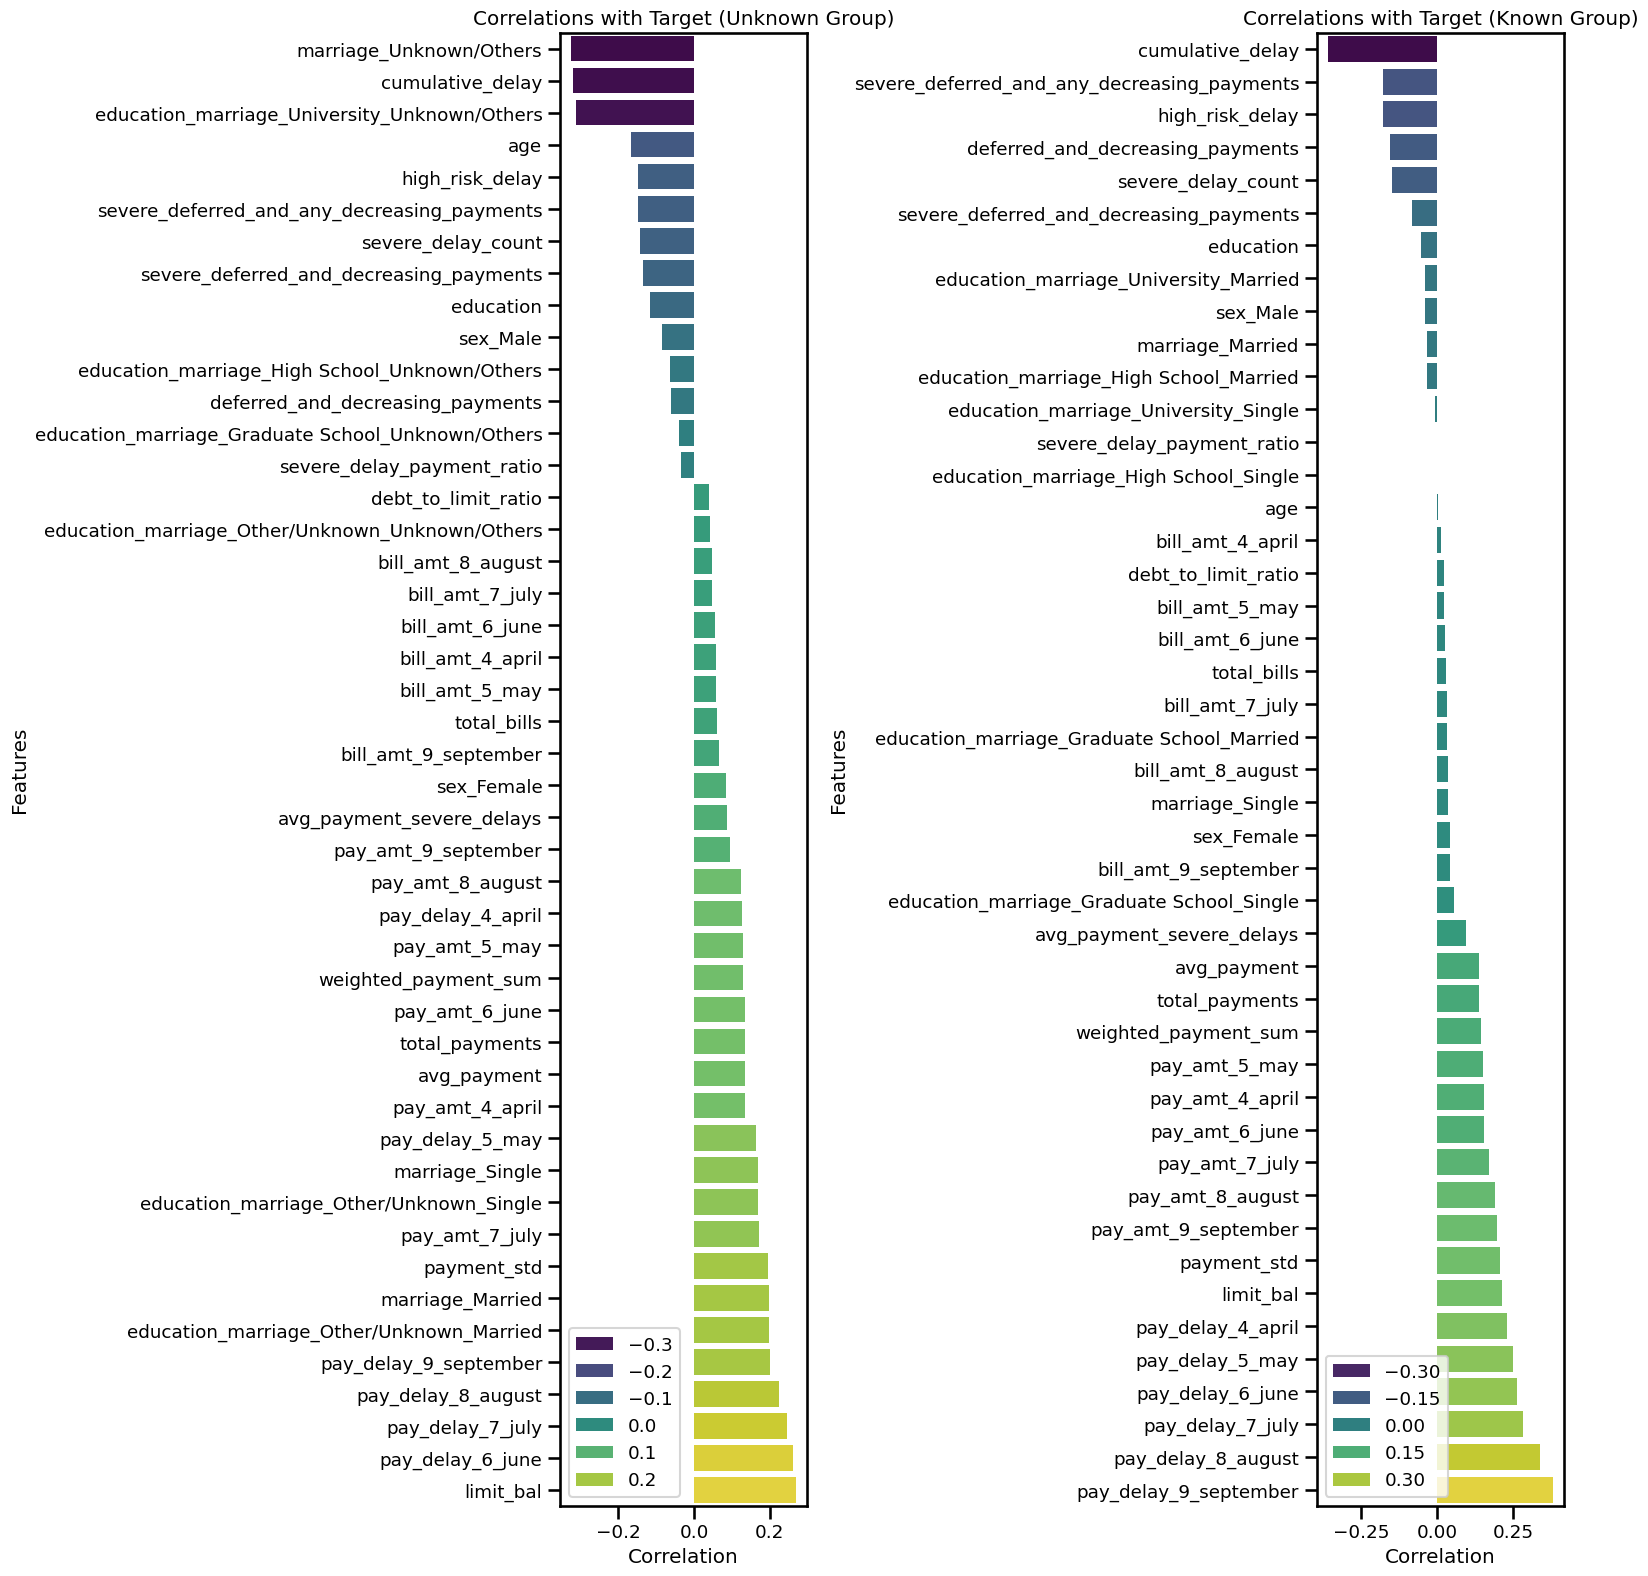

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into "Unknown" and "Known" groups based on any of the "Unknown" columns
group_unknown_processed = X_train_processed_df[X_train_processed_df[unknown_columns].max(axis=1) == 1]
group_known_processed = X_train_processed_df[X_train_processed_df[unknown_columns].max(axis=1) == 0]

# Calculate correlations with the target for the group_unknown_processed
correlations_unknown = group_unknown_processed.corr()['target_codes'].drop('target_codes').dropna().sort_values()

# Calculate correlations with the target for the group_known_processed
correlations_known = group_known_processed.corr()['target_codes'].drop('target_codes').dropna().sort_values()

# Set up the figure and axes for a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 16))  # 1 row, 2 columns

# Plot correlations for Unknown Group
sns.barplot(y=correlations_unknown.index, x=correlations_unknown.values, ax=axes[0], hue=correlations_unknown.values, palette="viridis")
axes[0].set_title('Correlations with Target (Unknown Group)')
axes[0].set_xlabel('Correlation')
axes[0].set_ylabel('Features')

# Plot correlations for Known Group
sns.barplot(y=correlations_known.index, x=correlations_known.values, ax=axes[1], hue=correlations_known.values, palette="viridis")
axes[1].set_title('Correlations with Target (Known Group)')
axes[1].set_xlabel('Correlation')
axes[1].set_ylabel('Features')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


#### Loan Data Utils

In [1]:
script_content=r'''
# loan_data_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin

import json

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

target = 'default_payment_next_month'
# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

# ---------  Sex Column Processing  --------- #
# ---- SEX: Gender (1 = male, 2 = female) ----#

# results in cat.categories = ['Female', 'Male'][0,1]
def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

# results in cat.categories = ['Female', 'Male'][2,1] (alphabetically ordered)
def process_sex_column_cat_codes_one_two(df):
    try:
        if 'sex' in df.columns:
            # Convert numeric values to categorical, maintaining original codes
            df['sex'] = df['sex'].astype('category')  # First, ensure the column is categorical

            # Define the categories explicitly and map original values (1: Male, 2: Female)
            df['sex'].cat.set_categories([1, 2], rename=True, inplace=True)  # Set categories as 1, 2
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})  # Replace numeric values with labels

            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

# ---------  Marriage Column Processing  --------- #

# ---- MARRIAGE: Marital status (1 = married, 2 = single, 3 = other) ----#

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df

# ---------  Target Column Processing  --------- #

def process_default_payment_column(df):
    try:
        if 'default_payment_next_month' in df.columns:
            # Label the categories
            df['default_payment_next_month'] = df['default_payment_next_month'].replace({0: 'No Default', 1: 'Default'})
            df['default_payment_next_month'] = df['default_payment_next_month'].astype('category')
            logging.info("Default payment column labeled and converted to categorical successfully.")
        else:
            logging.warning("Default payment column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing default payment column: {e}")
    return df


# Convert labels to numeric for modeling
def convert_default_payment_to_numeric(df):
    try:
        if 'default_payment_next_month' in df.columns:
            df['default_payment_next_month'] = df['default_payment_next_month'].replace({'No Default': 0, 'Default': 1}).astype(int)
            logging.info("Default payment column converted back to numeric for modeling.")
        else:
            logging.warning("Default payment column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting default payment column to numeric: {e}")
    return df

# ---------  Pay Delay Column Processing  --------- #

def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

# ---------  Education Column Processing  --------- #

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


#-------- Utility and validation functions first ----------#

def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df


#--------  Load and Preprocess Data  --------- #

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            # df = process_sex_column_cat_codes_one_two(df)
            df = process_marriage_column(df)
            df = process_default_payment_column(df)
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

#--------  Load Preprocess Split Data  --------- #

def load_preprocess_split_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")

#--------  Plot Categorical Data Functions  --------- #

categorical_columns = [
    'default_payment_next_month', 'sex', 'education', 'marriage'
]

ordinal_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

def plot_categorical_distributions(df, categorical_columns):
    """Function to plot categorical distributions."""
    plt.figure(figsize=(16, 14))
    sns.set_context('talk')
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=column, hue=column, palette='Set3', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


def plot_ordinal_distributions(df, ordinal_columns):
    """Function to plot ordinal distributions using barplot with hue."""
    plt.figure(figsize=(16, 25))
    sns.set_context('talk', font_scale=0.8)
    for i, column in enumerate(ordinal_columns, 1):
        plt.subplot(3, 2, i)

        # Get the counts for each category
        category_counts = df[column].value_counts().sort_index()

        sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='Set3')

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Rotate x-tick labels for better legibility
        plt.xticks(rotation=45, ha='right')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# --------- Custom Transformer for Threshold Classifier --------- #

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=None, threshold=0.5):
        # Default to LogisticRegression if no classifier is provided
        self.base_classifier = base_classifier if base_classifier is not None else LogisticRegression(max_iter=1000)
        self.threshold = threshold

    def fit(self, X, y):
        # Fit the base classifier on the training data
        self.base_classifier.fit(X, y)
        return self

    def predict(self, X):
        # Get the predicted probabilities for class 1 (positive class)
        probas = self.base_classifier.predict_proba(X)[:, 1]
        # Apply the threshold to make class predictions
        return (probas >= self.threshold).astype(int)

    def predict_proba(self, X):
        # Return the predicted probabilities from the base classifier
        return self.base_classifier.predict_proba(X)


#--------  Classification Report Functions  --------- #

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")


# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

#--------  Classification Report Functions for Categories  --------- #

# Function to save classification reports with custom categories
def save_classification_reports_with_categories(reports, filename='classification_reports.json'):
    try:
        # Adjust the keys for the class labels to match your custom categories
        for model, report in reports.items():
            if '0' in report and '1' in report:
                report['No Default'] = report.pop('0')
                report['Default'] = report.pop('1')

        with open(filename, 'w') as json_file:
            json.dump(reports, json_file, indent=4)  # Pretty-printing for clarity
        print(f"Classification reports with categories saved as {filename}")
    except Exception as e:
        print(f"Error saving classification reports: {e}")

# Updated plotting function with category names and annotations
def plot_classification_report_metrics_with_categories(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['No Default', 'No Default', 'No Default', 'Default', 'Default', 'Default'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['No Default']['precision'],
            report['No Default']['recall'],
            report['No Default']['f1-score'],
            report['Default']['precision'],
            report['Default']['recall'],
            report['Default']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

#--------   Plot Selected Features  --------#

def plot_selected_features(selected_features, model_name, figsize=(16,8)):
    features = list(selected_features.keys())
    importances = list(selected_features.values())
    plt.figure(figsize=figsize)
    sns.barplot(x=importances, y=features, hue=importances, palette='viridis')
    plt.title(f'Selected Features and their Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [2]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [3]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully


#### Feature Engineering Pipeline Script

In [4]:
script_content = r'''
# feature_engineering_pipeline_utils.py

from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler
import pandas as pd

pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']

delay_columns = [
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]


# ------- Outlier Removal Transformer Winsor Robust Returns Pandas DataFrame --------#

class WinsorRobustOutlierRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Apply Winsorization (capping)
        for col in self.columns:
            X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])

        # Apply Robust Scaling
        X_transformed[self.columns] = self.scaler.transform(X_transformed[self.columns])

        # Convert back to DataFrame if X was a DataFrame
        if isinstance(X, pd.DataFrame):
            X_transformed = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)

        return X_transformed

# ------- High Risk Delay Feature Transformer -------#

class HighRiskDelayFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'high_risk_delay' feature
        X['high_risk_delay'] = X[self.delay_columns].apply(
            lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay',
                                      '6 months delay', '7 months delay', '8 months delay',
                                      '9+ months delay'] for delay in row),
            axis=1
        )

        return X

# ------- Severe Delay Count Transformer -------#

class SevereDelayCountTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_delay_count' feature
        X['severe_delay_count'] = X[self.delay_columns].apply(
            lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay',
                                                            '5 months delay', '6 months delay',
                                                            '7 months delay', '8 months delay',
                                                            '9+ months delay']),
            axis=1
        )

        return X

# ------- Cumulative Delay Transformer -------#

class AvgPaymentSevereDelaysTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # No parameters to initialize for this transformer

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define severe delay categories
        delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Calculate the average payment for severe delays
        def calculate_avg_payment_for_severe_delays(row):
            total_payment = 0
            severe_delay_months = 0
            for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
                if row[f'pay_delay_{i+4}_{month}'] in delays:
                    total_payment += row[f'pay_amt_{i+4}_{month}']
                    severe_delay_months += 1
            return total_payment / severe_delay_months if severe_delay_months > 0 else 0

        # Apply the function to each row
        X['avg_payment_severe_delays'] = X.apply(calculate_avg_payment_for_severe_delays, axis=1)

        return X


# ------- Cumulative Delay Transformer -------#

class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'cumulative_delay' feature
        X['cumulative_delay'] = X[self.delay_columns].apply(
            lambda row: sum(self.delay_mapping.get(delay, 0) for delay in row),
            axis=1
        )

        return X


# ------- Severe Delay Payment Ratio Transformer -------#

class SevereDelayPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, scaling_factor=10000):
        self.pay_columns = pay_columns
        self.scaling_factor = scaling_factor

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payment across the specified columns
        X['total_payment'] = X[self.pay_columns].sum(axis=1)

        # Calculate the severe delay payment ratio
        X['severe_delay_payment_ratio'] = X.apply(
            lambda row: (row['severe_delay_count'] / row['total_payment'] * self.scaling_factor)
            if row['total_payment'] > 0 else 0,
            axis=1
        )

        # Drop the temporary 'total_payment' column if desired
        X.drop(columns=['total_payment'], inplace=True)

        return X


# ------- Deferred & Decreasing Payments Transformer -------#

class DeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'deferred_and_decreasing_payments' feature
        X['deferred_and_decreasing_payments'] = X.apply(self._check_deferred_and_decreasing, axis=1)

        return X

    def _check_deferred_and_decreasing(self, row):
        delays = ['1 month delay', '2 months delay', '3 months delay',
                  '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Initialize list to store payments in months with any delay
        delay_payments = []

        # Iterate over the months and collect payments for any delay
        for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
            if row[f'pay_delay_{i+4}_{month}'] in delays:
                delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

        # Check if payments are decreasing over time
        for j in range(1, len(delay_payments)):
            if delay_payments[j] > delay_payments[j-1]:
                return False  # Payments are not consistently decreasing

        return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing


# ------- Severe Deferred & Decreasing Payments Transformer -------#

class SevereDeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_decreasing_payments' feature
        X['severe_deferred_and_decreasing_payments'] = X.apply(self._check_severe_deferred_and_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

        # Return True if both conditions are met
        return deferred and decreasing


# ------- Severe Deferred & Any Decreasing Payments Transformer -------#

class SevereDeferredAndAnyDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_any_decreasing_payments' feature
        X['severe_deferred_and_any_decreasing_payments'] = X.apply(self._check_severe_deferred_and_any_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_any_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are severe deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing (any decrease)
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

        # Return True if both conditions are met
        return deferred and decreasing

# ---------------------------------------------------#
# ---------- Ratio and Interaction Features ---------#
# ---------------------------------------------------#

# ------- Bill To Payment Ratio Transformer -------#

class BillToPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, month):
        self.month = month

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define the column names based on the month
        ratio_column = f'bill_to_payment_ratio_{self.month}'
        bill_column = f'bill_amt_{self.month}'
        pay_column = f'pay_amt_{self.month}'

        # Calculate the bill-to-payment ratio
        X[ratio_column] = X[bill_column] / X[pay_column].replace(0, np.nan)
        X[ratio_column] = X[ratio_column].fillna(0)

        return X

# ------- Total Payments Transformer -------#

class TotalPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payments across the specified columns
        X['total_payments'] = X[self.pay_columns].sum(axis=1)

        return X

# ------- Average Payment Transformer -------#

class AvgPaymentTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_payments_column='total_payments', num_months=6):
        self.total_payments_column = total_payments_column
        self.num_months = num_months

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the average payment
        X['avg_payment'] = X[self.total_payments_column] / self.num_months

        return X

# ------- Standard Deviation Transformer -------#

class PaymentStdTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the standard deviation of payments across the specified columns
        X['payment_std'] = X[self.pay_columns].std(axis=1)

        return X

# ------- Weighted Payment Sum Transformer -------#

class WeightedPaymentSumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, weights=None):
        self.pay_columns = pay_columns
        self.weights = weights if weights is not None else [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]  # Default weights

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the weighted payment sum across the specified columns
        X['weighted_payment_sum'] = (X[self.pay_columns] * self.weights).sum(axis=1)

        # Return the DataFrame with all original columns plus the new feature
        return X



# ------- Debt To Limit Ratio Transformer -------#

class TotalBillsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bill_columns):
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total bills across the specified columns
        X['total_bills'] = X[self.bill_columns].sum(axis=1)

        return X


class DebtToLimitRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_bills_column='total_bills', limit_bal_column='limit_bal'):
        self.total_bills_column = total_bills_column
        self.limit_bal_column = limit_bal_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Handle cases where limit_bal is zero to avoid division by zero
        epsilon = 1e-10  # Small value to avoid division by zero
        X['debt_to_limit_ratio'] = X[self.total_bills_column] / (X[self.limit_bal_column] + epsilon)

        # Handle infinite values, though this should be rare due to the epsilon
        X['debt_to_limit_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)

        return X


# ------- Education & Marriage Interaction Transformer -------#

class EducationMarriageInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_column='education', marriage_column='marriage'):
        self.education_column = education_column
        self.marriage_column = marriage_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create the education_marriage interaction feature
        X['education_marriage'] = X[self.education_column].astype(str) + '_' + X[self.marriage_column].astype(str)

        return X

# ------- Combined Feature Engineering Transformer for IMBPipeline -------#

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        return X


'''

# Write the script to a file
with open("feature_engineering_pipeline_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_pipeline_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_pipeline_utils
importlib.reload(feature_engineering_pipeline_utils)

from feature_engineering_pipeline_utils import *

Script successfully written to feature_engineering_pipeline_utils.py


In [ ]:
X['education'].astype(str) + '_' + X['marriage'].astype(str)

,0
0,University_Married
1,University_Single
2,University_Single
3,University_Married
4,University_Married
...,...
29995,High School_Married
29996,High School_Single
29997,University_Single
29998,High School_Married
